# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from ID3 import ID3 # import as a module
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # ignore warnings
plt.style.use('seaborn')

# Import Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gsprint23/cpts215/master/progassignments/files/titanic.txt')
df.head()

,class,age,sex,survived
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [3]:
cols = ['class','age','sex']
df['survived'] = df['survived'].apply(lambda x: False if x==0 else True)
X = df.loc[:,cols].values
y = df['survived'].ravel()

# Cross Val Score
Accuracies, F1, Precision and Recall for both of the models

In [4]:
CV = range(2,21)
id_mat = {'test_accuracy':[],'test_precision':[],'test_recall':[],'test_f1':[]} # store the results
d_tree_mat = {'test_accuracy':[],'test_precision':[],'test_recall':[],'test_f1':[]}
keys = list(id_mat.keys())

for cv in CV:
    id3_scores = cross_validate(ID3(cols),X,y,cv=cv,scoring=['accuracy','precision','recall','f1'])
    # cross validation

    
    d_tree_scores = cross_validate(DecisionTreeClassifier(),X,y,cv=cv,
                               scoring=['accuracy','precision','recall','f1'])
    
    for key in keys:
        id_mat[key].append(id3_scores[key].mean()) # store mean results
        
        d_tree_mat[key].append(d_tree_scores[key].mean())
        

# Plot Result Matrics

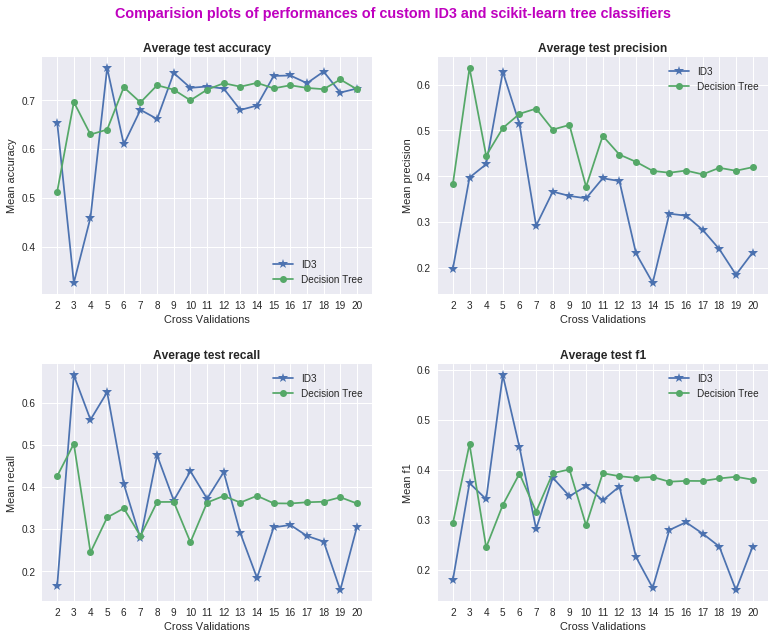

In [5]:
f,ax = plt.subplots(2,2,figsize=(13,10)) # 4 subplots
ax = ax.ravel() # flatten the array 

f.suptitle('Comparision plots of performances of custom ID3 and scikit-learn tree classifiers',
           size='x-large',weight='bold',color='m',y=0.95) # super title

for i in range(4):
    ax[i].plot(CV,id_mat[keys[i]],
               label='ID3',marker='*',markersize=11) # id3 plot
    ax[i].plot(CV,d_tree_mat[keys[i]],label='Decision Tree',marker='o')
    ax[i].set_title('Average '+keys[i].replace('_',' '),weight='bold')
    ax[i].set_xlabel('Cross Validations')
    ax[i].set_ylabel('Mean '+keys[i].split('_')[1])
    ax[i].set_xticks(CV) # set the x ticks as the CV values 
    ax[i].legend() # plot legends
    
plt.subplots_adjust(hspace=0.3) # increase the height space
plt.savefig('id3 vs DecisionTree.png')

1. We Notice that with the increase in number of K as split portion, sklearn's classifier tends to shift to a mean Accuracy score of around 0.7 while our ID3 tends to fluctuate around the score. Our Classiifer gives the better accuracy until 12 CVs but then starts to drop.

2. As we increae the number of K, the mean accuracy and other metrics tend to fall. IT might be due to the reason that there are not the classes present in the while the splitting so the scorer sets the precision and recall to 0 and it affects the mean score.

3. Our ID3 model is better than Sklear's in terms of accuracy and recall but fluactuates a lot when sklear's model tend to give  results around a value.

# Plot Tree

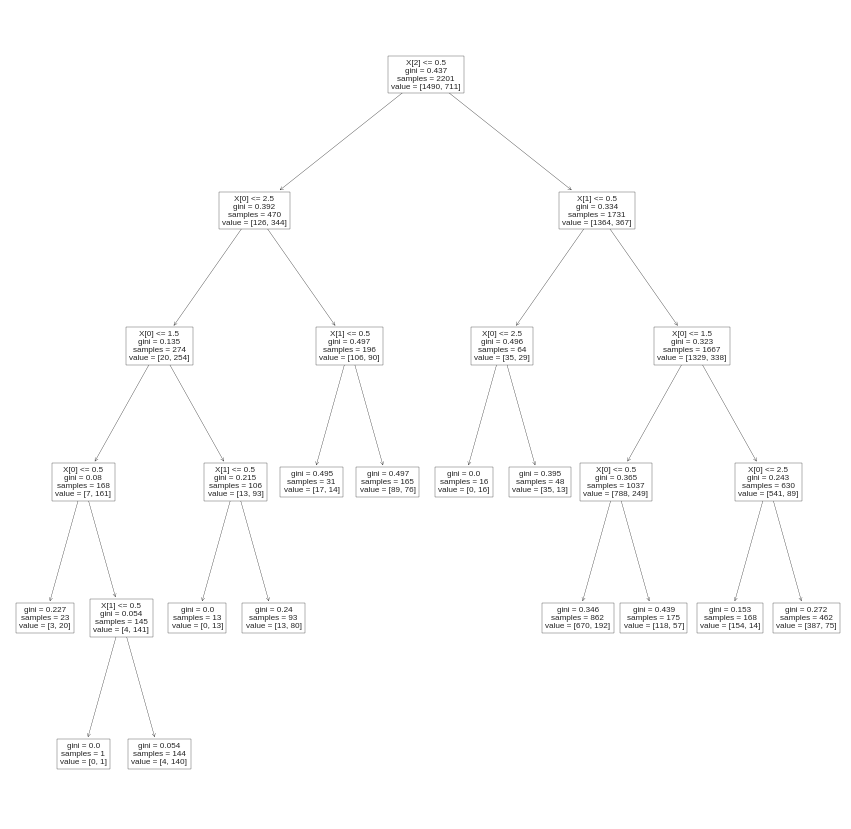

In [6]:
tree = DecisionTreeClassifier()
tree.fit(X,y) # get tree

f,ax = plt.subplots(figsize=(15,15))
plot_tree(tree,ax=ax) # inbuilt method by sklearn.tree
plt.savefig('tree.png')

# Comparision

In [7]:
CV = [3,7,11,15,19] # 5 different CV values

id_mat = {'test_accuracy':[],'test_precision':[],'test_recall':[],'test_f1':[]}
reg_mat = {'test_accuracy':[],'test_precision':[],'test_recall':[],'test_f1':[]}
knn_mat = {'test_accuracy':[],'test_precision':[],'test_recall':[],'test_f1':[]}
keys = list(reg_mat.keys()) # get keys of above dictonary

for cv in CV:
    id3_scores = cross_validate(ID3(cols),X,y,cv=cv,scoring=['accuracy','precision','recall','f1'])
    
    reg_scores = cross_validate(LogisticRegression(),X,y,cv=cv,
                                scoring=['accuracy','precision','recall','f1'])

    
    knn_scores = cross_validate(KNeighborsClassifier(),X,y,cv=cv,
                               scoring=['accuracy','precision','recall','f1'])
    
    for key in keys:
        id_mat[key].append(id3_scores[key].mean()) # get average scores
        
        reg_mat[key].append(reg_scores[key].mean())
        
        knn_mat[key].append(knn_scores[key].mean())
        

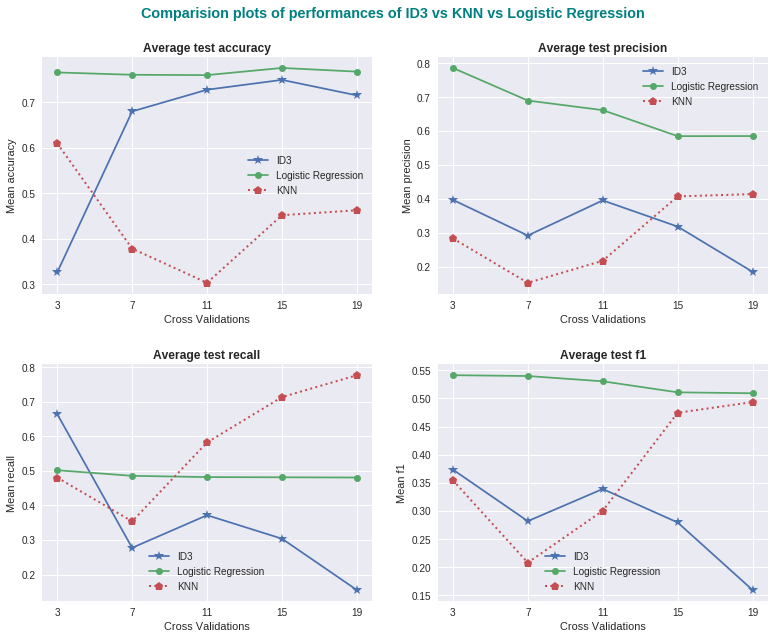

In [8]:
f,ax = plt.subplots(2,2,figsize=(13,10))
ax = ax.ravel()

f.suptitle('Comparision plots of performances of ID3 vs KNN vs Logistic Regression',
           size='x-large',weight='bold',color='teal',y=0.95)

for i in range(4):
    ax[i].plot(CV,id_mat[keys[i]],
               label='ID3',marker='*',markersize=11)
    ax[i].plot(CV,reg_mat[keys[i]],label='Logistic Regression',marker='o')
    ax[i].plot(CV,knn_mat[keys[i]],label='KNN',marker='p',markersize=9,ls='dotted',lw=2)
    ax[i].set_title('Average '+keys[i].replace('_',' '),weight='bold')
    ax[i].set_xlabel('Cross Validations')
    ax[i].set_ylabel('Mean '+keys[i].split('_')[1])
    ax[i].set_xticks(CV)
    ax[i].legend()
    
plt.subplots_adjust(hspace=0.3)
plt.savefig('id3 vc Logistic Regression vs KNN.png')